# Module 1 - Feature Extraction, Dimensionality Reduction, Feature Ranking

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import os
from scipy import stats
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
%matplotlib inline

## Load Data

In [4]:
data_dir = r'C:\Users\alexa\Documents\GeorgiaTech\Classes\Year4\CS4641'
datasets = os.listdir(data_dir)
print(datasets)

['US_Accidents_Dec19.csv', 'US_WeatherEvents_2016-2019.csv']


In [5]:
df = pd.read_csv(data_dir + '\\' + datasets[0])

In [6]:
print(df.shape)
print(df.dtypes)
# print(df.describe())
df.head()

(2974335, 49)
ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          floa

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


## Extract Labels

In [7]:
y = df['Severity']
y = np.reshape(y, (y.shape[0], 1))

C:\Users\alexa\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [8]:
print(y.shape)
print(stats.describe(y))

(2974335, 1)
DescribeResult(nobs=2974335, minmax=(array([1], dtype=int64), array([4], dtype=int64)), mean=array([2.36019009]), variance=array([0.29319336]), skewness=array([1.15215415]), kurtosis=array([0.33720334]))


## Drop Some Features

In [9]:
bad_features = ['ID', 'Source', 'TMC', 'End_Lat', 'End_Lng', 'Description', 'Number', 'Street', 'Side', 'County', 'Zipcode', 'Country', 'Timezone', 'Airport_Code']
#keep City and State, use to select data to focus on
#TMC could be useful but 1/4 are missing

X = df.drop('Severity', 1) #this will be our supervised label
X = X.drop(bad_features, 1)

In [10]:
print(X.shape)
print(X.dtypes)
X.head()

(2974335, 34)
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
City                      object
State                     object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Turning_Loop                b

,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Dayton,OH,2016-02-08 05:58:00,36.9,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Reynoldsburg,OH,2016-02-08 05:51:00,37.9,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Williamsburg,OH,2016-02-08 06:56:00,36.0,33.3,...,False,False,False,False,True,False,Night,Night,Day,Day
3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Dayton,OH,2016-02-08 07:38:00,35.1,31.0,...,False,False,False,False,False,False,Night,Day,Day,Day
4,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Dayton,OH,2016-02-08 07:53:00,36.0,33.3,...,False,False,False,False,True,False,Day,Day,Day,Day


## Fill In Missing Data

In [11]:
X.isnull().sum()

Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
City                          83
State                          0
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitation(in)        1998358
Weather_Condition          65932
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Su

In [12]:
def impute_median(series):
    return series.fillna(series.median())

In [13]:
#fill in missing numerical data

X['Temperature(F)'] = X['Temperature(F)'].transform(impute_median)
X['Wind_Chill(F)'] = X['Wind_Chill(F)'].transform(impute_median)
X['Humidity(%)'] = X['Humidity(%)'].transform(impute_median)
X['Pressure(in)'] = X['Pressure(in)'].transform(impute_median)
X['Visibility(mi)'] = X['Visibility(mi)'].transform(impute_median)
X['Wind_Speed(mph)'] = X['Wind_Speed(mph)'].transform(impute_median)
X['Precipitation(in)'] = X['Precipitation(in)'].transform(impute_median)

In [14]:
X.isnull().sum()

Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
City                        83
State                        0
Weather_Timestamp        36705
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           45101
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        65932
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset              93
Civil_Twilight              93
Nautical

In [15]:
print(X.dtypes)

Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
City                      object
State                     object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Turning_Loop                bool
Sunrise_Su

In [16]:
#fill in missing categorical data with mode

# print(X['Side'].mode())
print(X['City'].mode())
print(X['State'].mode())
print(X['Weather_Timestamp'].mode())
print(X['Wind_Direction'].mode())
print(X['Weather_Condition'].mode())
print(X['Sunrise_Sunset'].mode())
print(X['Civil_Twilight'].mode())
print(X['Nautical_Twilight'].mode())
print(X['Astronomical_Twilight'].mode())

0    Houston
dtype: object
0    CA
dtype: object
0    2019-09-17 07:53:00
1    2019-09-24 07:53:00
dtype: object
0    Calm
dtype: object
0    Clear
dtype: object
0    Day
dtype: object
0    Day
dtype: object
0    Day
dtype: object
0    Day
dtype: object


In [17]:
# X['Side'].fillna(str(X['Side'].mode().values[0]), inplace=True)
X['City'].fillna(str(X['City'].mode().values[0]), inplace=True) #or should these be dropped, only 83
X['State'].fillna(str(X['State'].mode().values[0]), inplace=True)
X['Weather_Timestamp'].fillna(str(X['Weather_Timestamp'].mode().values[0]), inplace=True)
X['Wind_Direction'].fillna(str(X['Wind_Direction'].mode().values[0]), inplace=True)
X['Weather_Condition'].fillna(str(X['Weather_Condition'].mode().values[0]), inplace=True)
X['Sunrise_Sunset'].fillna(str(X['Sunrise_Sunset'].mode().values[0]), inplace=True)
X['Civil_Twilight'].fillna(str(X['Civil_Twilight'].mode().values[0]), inplace=True)
X['Nautical_Twilight'].fillna(str(X['Nautical_Twilight'].mode().values[0]), inplace=True)
X['Astronomical_Twilight'].fillna(str(X['Astronomical_Twilight'].mode().values[0]), inplace=True)

In [18]:
#clean up time

X['Start_Time'] = pd.to_datetime(X['Start_Time'])
X['End_Time'] = pd.to_datetime(X['End_Time'])
X['Weather_Timestamp'] = pd.to_datetime(X['Weather_Timestamp'])

X['start_day'] = X['Start_Time'].dt.day.astype(np.int64)
X['start_weekday'] = X['Start_Time'].dt.weekday.astype(np.int64)
X['start_month'] = X['Start_Time'].dt.month.astype(np.int64)
X['start_hour'] = X['Start_Time'].dt.hour.astype(np.int64)
X['start_minute'] = X['Start_Time'].dt.minute.astype(np.int64)
X['start_second'] = X['Start_Time'].dt.second.astype(np.int64)

X['end_day'] = X['End_Time'].dt.day.astype(np.int64)
X['end_weekday'] = X['End_Time'].dt.weekday.astype(np.int64)
X['end_month'] = X['End_Time'].dt.month.astype(np.int64)
X['end_hour'] = X['End_Time'].dt.hour.astype(np.int64)
X['end_minute'] = X['End_Time'].dt.minute.astype(np.int64)
X['end_second'] = X['End_Time'].dt.second.astype(np.int64)

X['weather_day'] = X['Weather_Timestamp'].dt.day.astype(np.int64)
X['weather_weekday'] = X['Weather_Timestamp'].dt.weekday.astype(np.int64)
X['weather_month'] = X['Weather_Timestamp'].dt.month.astype(np.int64)
X['weather_hour'] = X['Weather_Timestamp'].dt.hour.astype(np.int64)
X['weather_minute'] = X['Weather_Timestamp'].dt.minute.astype(np.int64)
X['weather_second'] = X['Weather_Timestamp'].dt.second.astype(np.int64)

# X['duration'] = #TODO determine crash duration based on Start_Time and End_Time

X = X.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], 1)

In [19]:
X.isnull().sum()

Start_Lat                0
Start_Lng                0
Distance(mi)             0
City                     0
State                    0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
start_day                0
start_weekday            0
start_month              0
start_hour               0
start_minute             0
start_second             0
e

In [20]:
print(X.shape)
print(X.dtypes)
X.head()

(2974335, 49)
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
City                      object
State                     object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Turning_Loop                bool
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         obj

,Start_Lat,Start_Lng,Distance(mi),City,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,end_month,end_hour,end_minute,end_second,weather_day,weather_weekday,weather_month,weather_hour,weather_minute,weather_second
0,39.865147,-84.058723,0.01,Dayton,OH,36.9,54.0,91.0,29.68,10.0,...,2,11,0,0,8,0,2,5,58,0
1,39.928059,-82.831184,0.01,Reynoldsburg,OH,37.9,54.0,100.0,29.65,10.0,...,2,6,37,59,8,0,2,5,51,0
2,39.063148,-84.032608,0.01,Williamsburg,OH,36.0,33.3,100.0,29.67,10.0,...,2,7,19,27,8,0,2,6,56,0
3,39.747753,-84.205582,0.01,Dayton,OH,35.1,31.0,96.0,29.64,9.0,...,2,7,53,34,8,0,2,7,38,0
4,39.627781,-84.188354,0.01,Dayton,OH,36.0,33.3,89.0,29.65,6.0,...,2,8,9,7,8,0,2,7,53,0


## Replace True/False and Categorical Features

In [21]:
#convert True/False to 1/0

#https://pbpython.com/categorical-encoding.html
#https://pbpython.com/categorical-encoding.html

boolean_features = list(X.select_dtypes(include=['bool']).columns)
print(boolean_features)
X[boolean_features] = X[boolean_features].astype(np.int64)

['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']


In [22]:
print(X.dtypes)

Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
City                      object
State                     object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                    int64
Bump                       int64
Crossing                   int64
Give_Way                   int64
Junction                   int64
No_Exit                    int64
Railway                    int64
Roundabout                 int64
Station                    int64
Stop                       int64
Traffic_Calming            int64
Traffic_Signal             int64
Turning_Loop               int64
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         object
Astronomic

In [23]:
# encoding = {'Side': {'R': 0, 'L': 1}} #TODO there is a default value 
# temp = X.replace(encoding, inplace=False)

# print(temp.shape)
# print(temp.dtypes)
# temp.head()

In [24]:
#convert categorial data using One-Hot Encoding

one_hot_features = list(X.select_dtypes(include=['object']).columns)
print(one_hot_features)
one_hot_features.remove('City')
one_hot_features.remove('State')
print(one_hot_features)

print(X.shape)

['City', 'State', 'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
['Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
(2974335, 49)


In [25]:
temp = pd.get_dummies(X, columns=one_hot_features) #TODO make int64
X = temp #fixes problem where only the one_hot_features are saved in the dataframe...

print(X.shape)

(2974335, 195)


In [26]:
descriptors = ['City', 'State']
description = X[descriptors].copy(deep=True)
print('Description:', description.shape)

X = X.drop(descriptors, 1)
print('X:', X.shape)

Description: (2974335, 2)
X: (2974335, 193)


In [27]:
print(X.shape)

datatypes = dict(X.dtypes)
for k, v in datatypes.items():
    print('%55s - %s - %s' % (str(k), str(v), type(v)))

(2974335, 193)
                                              Start_Lat - float64 - <class 'numpy.dtype'>
                                              Start_Lng - float64 - <class 'numpy.dtype'>
                                           Distance(mi) - float64 - <class 'numpy.dtype'>
                                         Temperature(F) - float64 - <class 'numpy.dtype'>
                                          Wind_Chill(F) - float64 - <class 'numpy.dtype'>
                                            Humidity(%) - float64 - <class 'numpy.dtype'>
                                           Pressure(in) - float64 - <class 'numpy.dtype'>
                                         Visibility(mi) - float64 - <class 'numpy.dtype'>
                                        Wind_Speed(mph) - float64 - <class 'numpy.dtype'>
                                      Precipitation(in) - float64 - <class 'numpy.dtype'>
                                                Amenity - int64 - <class 'numpy.dtype

## Select City for Further Analysis

In [29]:
state_counts = description.groupby('State').count().reset_index()
state_counts = state_counts.sort_values(by='City', ascending=False)
print(state_counts)

city_counts = description.groupby('City').count().reset_index()
city_counts = city_counts.sort_values(by='State', ascending=False)
print(city_counts)

   State    City
3     CA  663204
41    TX  298062
8     FL  223746
38    SC  146689
25    NC  142460
32    NY  137799
36    PA   90395
20    MI   88694
12    IL   86390
9     GA   83620
43    VA   79957
35    OR   70840
21    MN   62727
2     AZ   62330
45    WA   61367
40    TN   58289
33    OH   55863
16    LA   52481
34    OK   51297
29    NJ   49942
18    MD   43328
42    UT   41385
4     CO   40124
0     AL   36369
17    MA   33014
13    IN   30040
22    MO   29012
5     CT   22803
27    NE   22505
15    KY   19122
46    WI   17580
37    RI   10483
10    IA   10346
31    NV    9524
28    NH    7064
14    KS    6887
23    MS    5961
30    NM    5020
7     DE    4434
6     DC    3653
47    WV    2274
19    ME    2065
11    ID    1757
1     AR    1749
44    VT     585
24    MT     504
48    WY     492
39    SD      60
26    ND      43
                      City  State
4792               Houston  93372
1744             Charlotte  68054
5944           Los Angeles  65851
416           

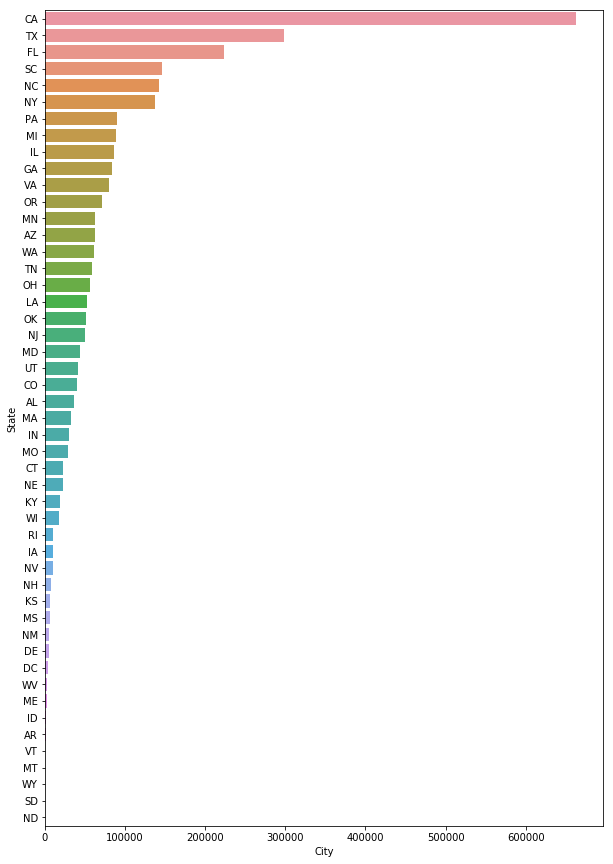

In [65]:
f, ax = plt.subplots(figsize=(10, 15))
sb.barplot(y='State', x='City', data=state_counts)

In [135]:
city = 'Houston'
city_info = city_counts.loc[city_counts['City'] == city]
# index = city_counts.index[city_counts['City'] == city].tolist()[0]
print(city_info)
# print(city_info.at[index, 'State'])

city_index = description.index[description['City'] == city].tolist()
Xcity = X.iloc[city_index].copy(deep=True)
print(Xcity.shape)
Xcity.head()

         City  State
4792  Houston  93372
(93372, 193)


,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
85973,34.451862,-117.660103,0.00,94.6,54.0,15.0,29.73,10.0,15.0,0.0,...,0,0,1,0,1,0,1,0,1,0
111085,34.451862,-117.660103,0.01,91.0,54.0,11.0,29.78,10.0,5.8,0.0,...,0,0,1,0,1,0,1,0,1,0
119777,27.388653,-82.441948,0.01,73.9,54.0,64.0,30.22,10.0,9.2,0.0,...,0,0,1,0,1,0,1,0,1,0
122934,27.387951,-82.440239,0.01,72.0,54.0,61.0,30.17,10.0,7.0,0.0,...,0,0,1,0,1,0,1,0,1,0
123707,27.388653,-82.441948,0.01,59.0,54.0,87.0,29.88,10.0,7.0,0.0,...,0,0,1,0,1,0,1,0,1,0


## PCA

### Plotting

C:\Users\alexa\Documents\GitHub\traffic-accident-weather-analysis\code\pca\Houston
21 components needed to explain 80.00% of variance
26 components needed to explain 85.00% of variance
32 components needed to explain 90.00% of variance
41 components needed to explain 95.00% of variance
50 components needed to explain 98.00% of variance
55 components needed to explain 99.00% of variance
80 components needed to explain 99.90% of variance


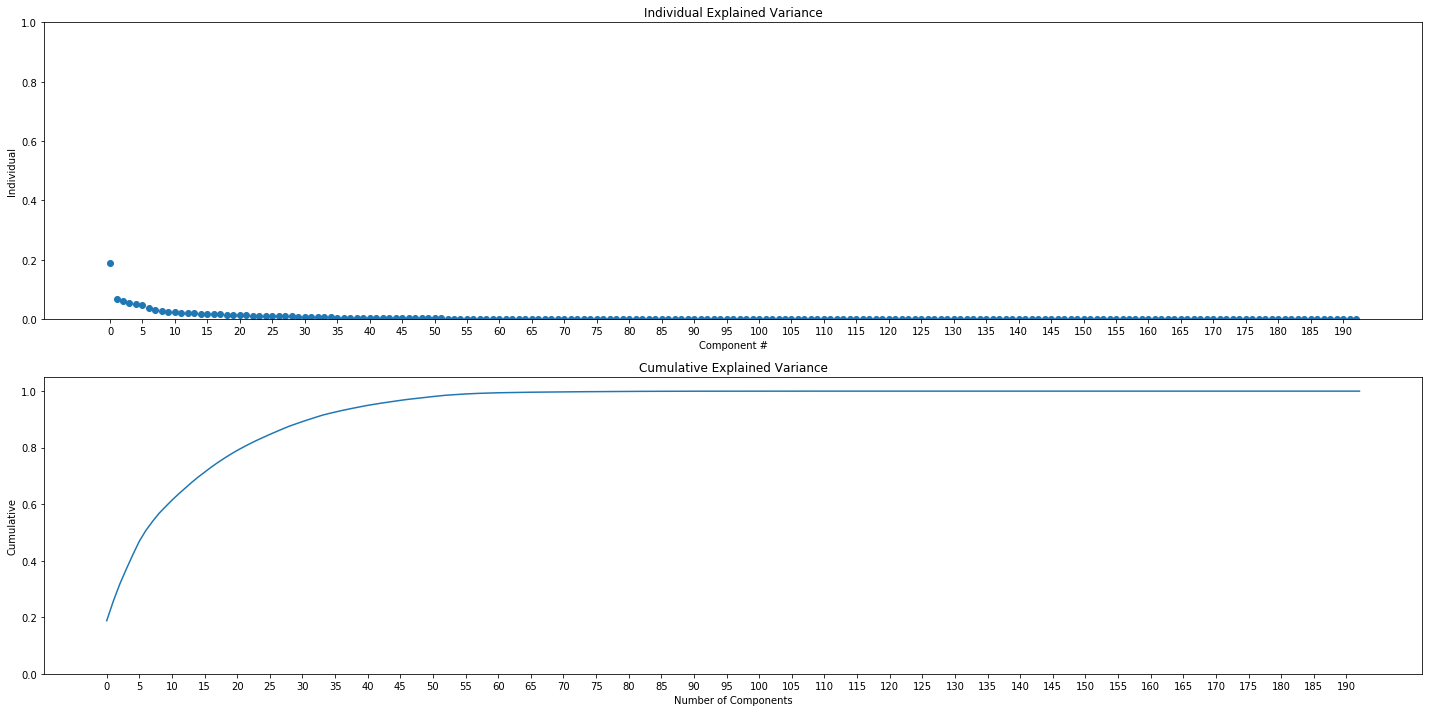

In [203]:
#----

current_dir = os.getcwd()
save_dir = current_dir + '\\pca\\'+city
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

num_features = X_city.shape[1] #use top D features for testing, in the end this will be all
desired_explained_variance = [0.80, 0.85, .90, .95, .98, .99, .999]
filename = save_dir + '\\pca_'+'f{:03d}'.format(num_features)

#----

feature_names = X.columns

scaler = MinMaxScaler(feature_range=[0, 1]) #scale data to [0, 1] range
X_scaler = scaler.fit_transform(Xcity.loc[:, feature_names[0]:feature_names[num_features-1]])
pca = PCA()
pca.fit(X_scaler)

explained_variance = pca.explained_variance_ratio_
components = pca.components_

fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))

ax1 = plt.subplot(2, 1, 1)
plt.xticks(np.arange(0, num_features, (1 if num_features < 10 else 5)))
plt.ylim(0, 1)
plt.xlabel('Component #')
plt.ylabel('Individual')
plt.title('Individual Explained Variance')
plt.scatter(np.arange(0, num_features), explained_variance)

ax2 = plt.subplot(2, 1, 2)
plt.xticks(np.arange(0, num_features, (1 if num_features < 10 else 5)))
plt.ylim(0, 1.05)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative')
plt.title('Cumulative Explained Variance')
plt.plot(np.cumsum(explained_variance))

plt.tight_layout()

# pcs = ['PC-'+str(i+1) for i in range(0, num_features)]
# pca_df = pd.DataFrame(components, columns=X.columns[0:num_features], index=pcs)
# print(pca_df, '\n')

file = open(filename+'.txt', 'w')
for desired in desired_explained_variance:
    num_features_needed = np.where((np.cumsum(explained_variance) > desired) == 1)[0][0]
    line = '%d components needed to explain %.2f%% of variance' % (num_features_needed, desired*100)
    print(line)
    file.write(line+'\n')
file.close()

np.savetxt(filename+'.out', components, delimiter=',')

fig.savefig(filename+'.png') #save plot image for reference
#     pca_df.to_csv(filename+'.csv', index=False) #save new Z space components. Transfer to Z space using top K components: NxD * (KxD)' = DxK

### Saving

In [186]:
#individual - use this one

desired_variance = 0.999

scaler = MinMaxScaler(feature_range=[0, 1]) #scale data to [0, 1] range
# X_scaler = scaler.fit_transform(Xcity.loc[:, feature_names[0]:feature_names[num_features-1]]) # num_features = 74 #use top D features for testing, in the end this will be all
X_scaler = scaler.fit_transform(Xcity)

# pca = PCA(desired_variance)
# pca = PCA(n_components=2)
pca = PCA(n_components=3)

pca.fit(X_scaler)
Xpca = pca.transform(X_scaler)

components = pca.components_

print(Xcity.shape)
print(X_scaler.shape)
print(Xpca.shape)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

#save Z space data Xpca
filename = save_dir + '\\pca_f{:03d}'.format(pca.n_features_)+'_c{:03d}'.format(pca.n_components_)+'_v{:04d}'.format(int(np.sum(pca.explained_variance_ratio_)*10000))
np.save(filename+'.npy', Xpca)

(93372, 193)
(93372, 193)
(93372, 3)
[0.18791127 0.06819963 0.06105507]
0.3171659684887147


### Visualize

In [194]:
#NOTE load a 'pca/CITY/pca_..._c002_....npy' or 'pca/CITY/pca_..._c003_....npy' file

filename = save_dir + '\\pca_f193_c002_v2561'

Xpca = np.load(filename+'.npy')
print(Xpca.shape)

(93372, 2)


Number of data points: 93372
Severity Count: 93, 51724, 41522, 33


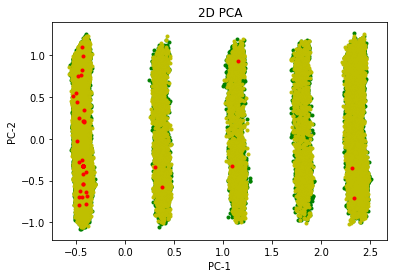

In [195]:
n = np.min([100000, Xpca.shape[0]])
print('Number of data points:', n)

if Xpca.shape[1] == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111)
        
    severity1 = np.where(y[0:n] == 1)
    severity2 = np.where(y[0:n] == 2)
    severity3 = np.where(y[0:n] == 3)
    severity4 = np.where(y[0:n] == 4)
    
    print('Severity Count: %d, %d, %d, %d' % (len(severity1[0]), len(severity2[0]), len(severity3[0]), len(severity4[0])))
    
    ax.scatter(Xpca[severity1, 0], Xpca[severity1, 1], marker='.', color='b')
    ax.scatter(Xpca[severity2, 0], Xpca[severity2, 1], marker='.', color='g')
    ax.scatter(Xpca[severity3, 0], Xpca[severity3, 1], marker='.', color='y')
    ax.scatter(Xpca[severity4, 0], Xpca[severity4, 1], marker='.', color='r')

    ax.set_xlabel('PC-1')
    ax.set_ylabel('PC-2')
    ax.set_title('2D PCA')
    plt.show()
    
    fig.savefig(save_dir + '\\2D.png')
    
elif Xpca.shape[1] == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    severity1 = np.where(y[0:n] == 1)
    severity2 = np.where(y[0:n] == 2)
    severity3 = np.where(y[0:n] == 3)
    severity4 = np.where(y[0:n] == 4)
    
    print('Severity Count: %d, %d, %d, %d' % (len(severity1[0]), len(severity2[0]), len(severity3[0]), len(severity4[0])))

    ax.scatter(Xpca[severity1, 0], Xpca[severity1, 1], Xpca[severity1, 2], marker='.', color='b')
    ax.scatter(Xpca[severity2, 0], Xpca[severity2, 1], Xpca[severity2, 2], marker='.', color='g')
    ax.scatter(Xpca[severity3, 0], Xpca[severity3, 1], Xpca[severity3, 2], marker='.', color='y')
    ax.scatter(Xpca[severity4, 0], Xpca[severity4, 1], Xpca[severity4, 2], marker='.', color='r')

    ax.set_xlabel('PC-1')
    ax.set_ylabel('PC-2')
    ax.set_zlabel('PC-3')
    ax.set_title('3D PCA')
    plt.show()
    
    fig.savefig(save_dir + '\\3D.png')

else:
    print('Invalid dimensions for 2D/3D visualization')

## Correlation Matrix

In [196]:
filename = save_dir + '\\pca_f193_c081_v9990'

Xpca = np.load(filename+'.npy')
print(Xpca.shape)

(93372, 81)


In [197]:
pca_df = pd.DataFrame.from_records(Xpca) #convert numpy array to pandas dataframe

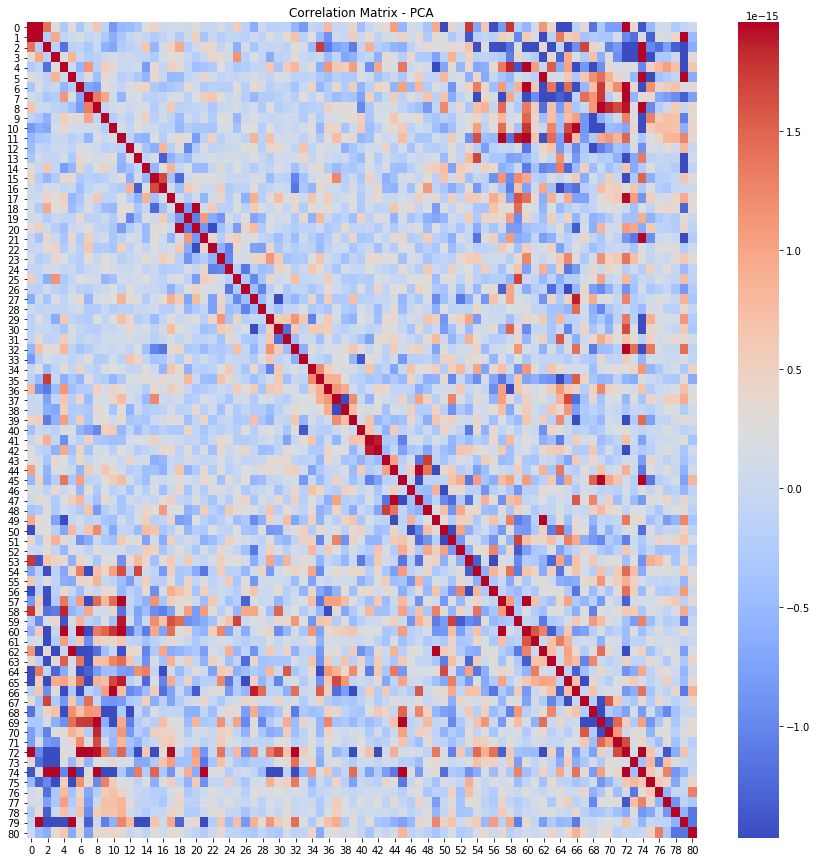

In [198]:
correlation = pca_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(correlation, ax=ax, cmap='coolwarm', robust=True, cbar=True)
ax.set_title('Correlation Matrix - PCA')
plt.show()

fig.savefig(save_dir + '\\correlation_pca.png')

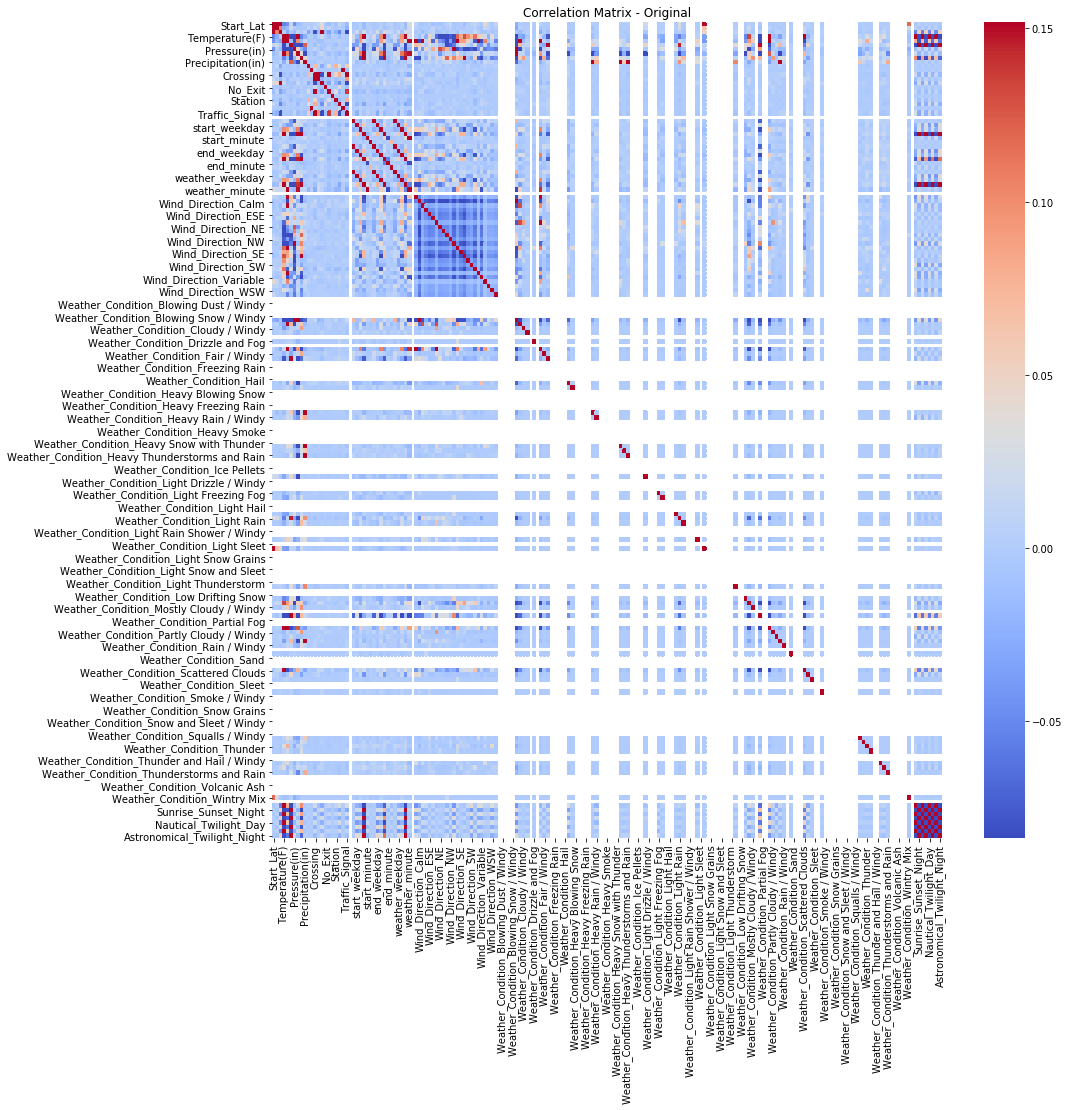

In [199]:
correlation = Xcity.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(correlation, ax=ax, cmap='coolwarm', robust=True, cbar=True)
ax.set_title('Correlation Matrix - Original')
plt.show()

fig.savefig(save_dir + '\\correlation_original.png')